## Semi

In [12]:
from _util import *
import _Experiment as _Experiment
import pickle
import Envs._env_SemiBandit as _env_SemiBandit
reload(_env_SemiBandit)
import Envs._env_SemiBandit_Real_Exp as _env_SemiBandit_real
reload(_env_SemiBandit_real)
import Agents_SemiBandit._agent_SemiBandit_TS as _agent_SemiBandit_TS 
import Agents_SemiBandit._agent_SemiBandit_LB as _agent_SemiBandit_LB 
import Agents_SemiBandit._agent_SemiBandit_MTB as _agent_SemiBandit_MTB
reload(_agent_SemiBandit_TS)
reload(_agent_SemiBandit_LB)
reload(_agent_SemiBandit_MTB)

<module 'Agents_SemiBandit._agent_SemiBandit_MTB' from '/home/ec2-user/SageMaker/MTTS_Structured_Bandits/Agents_SemiBandit/_agent_SemiBandit_MTB.py'>

In [8]:
L, T, K, p = 3000, 10000, 20, 4
with_intercept = False
same_reward = True
n_init = 300
# Sigma_gamma_factor = p * 2
results = {}
d = 4
X_transform = 'origin'
with_intercept = 0

update_freq = 50
update_freq_linear = 50

pm_core = 16

In [9]:
fp = 'Data/Semi_realdata_d_{}_X_transform_{}_with_intercept_{}_L_{}'.format(d, X_transform, with_intercept,L)
out = load(fp)   
p = d
# if with_intercept:
#     p += 1
mu_gamma = np.zeros(p)
sigma_gamma = np.identity(p)
sigma_1 = .040
sigma_2 = 1
true_gamma = out['true_gamma']
X = out['X']
true_theta = y = out['true_theta']

real = True
n_female = out['n_female']

In [ ]:
reload(_Experiment)
run = _Experiment.run_experiment(L = L, T = T, K = K, p = p
                                                 , Bandit_type = "SemiBandit", real = real
                                                 , sigma_1 = sigma_1
                                                 , sigma_2 = sigma_2
                                                 , with_intercept = with_intercept, same_reward = same_reward, clip = True
                                                 , save_prefix = 'SemiBandit_Real'
                                                 #, debug_MTB = False
                                                 , Sigma_gamma_factor = 1, Sigma_x_factor = 1
                                                 #, misspecification = None
                                                 #, only_ratio = False   
                                                 , MTS_freq = update_freq
                                                , n_init = n_init
                                                ,true_gamma = true_gamma, X = X, true_theta = true_theta, n_female = n_female)

r = run.run_multiple_parallel_in_batch(reps = 32, batch = 4, parallel = 'parmap')
# r = run.run_multiple_parallel(reps = 8, parallel = 'parmap')
run.plot_regret(plot_mean = True)
run.save(sub_folder = ["L", "T", "K", "p"])

n_female=1433 LB_freq=1 used_agends=all alpha_GLB=1 n_init=300 GLB_freq=100 MTS_freq=50 Sigma_x_factor=1 Sigma_gamma_factor=1 save_prefix=SemiBandit_Real with_intercept=0 sigma_2=1 sigma_1=0.04 Bandit_type=SemiBandit p=4 K=20 T=10000 L=3000
batch = 0


Meta TS (Ours):  40%|███▉      | 3992/10000 [28:19<08:09, 12.28it/s]   

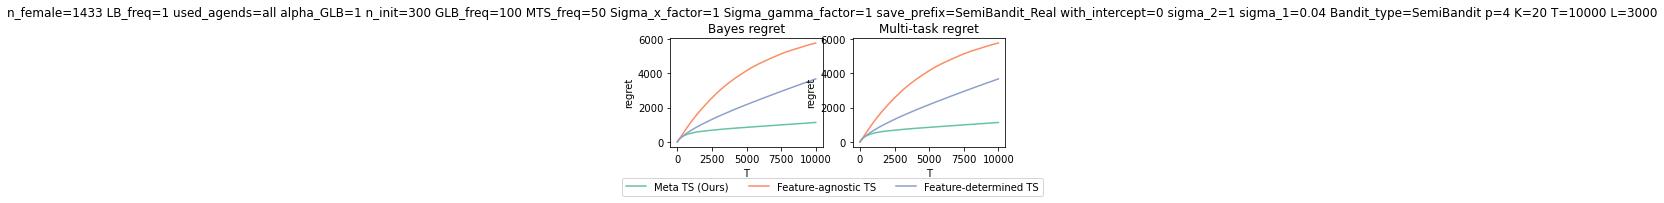

In [14]:
run.plot_regret(plot_mean = False)

## Cascading

In [56]:
from _util import *
import _Experiment as _Experiment
import Agents_Cascading._agent_Cascading_TS as _agent_Cascading_TS 
import Agents_Cascading._agent_Cascading_GLM as _agent_Cascading_GLM 
import Agents_Cascading._agent_Cascading_MTTS as _agent_Cascading_MTTS
reload(_agent_Cascading_TS)
reload(_agent_Cascading_GLM)
reload(_agent_Cascading_MTTS)


<module 'Agents_Cascading._agent_Cascading_MTTS' from '/home/ec2-user/SageMaker/MTTS_Structured_Bandits/Agents_Cascading/_agent_Cascading_MTTS.py'>

In [53]:
L, T, K, p = 3000, 50000, 5, 10
with_intercept = True
same_reward = True
n_init = 300
Sigma_gamma_factor = p * 2
results = {}
d = 10
phi_beta = 0.002
X_transform = 'standardize'
with_intercept = 1

update_freq = 500
update_freq_linear = 500

pm_core = 16
fp = 'Data/Cascading_realdata_d_{}_X_transform_{}_with_intercept_{}'.format(d, X_transform, with_intercept)
out = load(fp)   
W_test = load('Data/W_test.txt')
W_test = W_test[:,:]
p = d
if with_intercept:
    p += 1
mu_gamma = np.zeros(p)
sigma_gamma = np.identity(p)
true_gamma = out['true_gamma_wrt_test']
true_theta = out['W_test_mean'].copy()
true_theta = true_theta[:]
X = out['movie_features'][:,:].copy()

real = True
regret_type = 0 #the optimal S is selected by the save function as the movie recommendation in Movie-Recommendation-using-Cascading-Bandits

In [ ]:
reload(_Experiment)
run = _Experiment.run_experiment(L = L, T = T, K = K, p = p
                                , phi_beta = phi_beta, Bandit_type = "Cascading", real = real
                                #, print_SNR = True
                                #, debug_MTB = False
                                #, only_ratio = False   
                                , with_intercept = with_intercept, same_reward = same_reward, clip = True
                                , save_prefix = "Cascading_real"
                                , Sigma_gamma_factor = Sigma_gamma_factor#, Sigma_x_factor = Sigma_x_factor
                                #, misspecification = None
                                , MTS_freq = update_freq
                                , GLB_freq = update_freq_linear
    #                           , alpha_GLB = 0.25
                                , n_init = n_init
                                #, fixed_gamma0 = -2
                                ,true_gamma = true_gamma, X = X, true_theta = true_theta, W_test = W_test, regret_type = regret_type
                                            )


r = run.run_multiple_parallel(reps = 4, parallel = 'parmap')
# r = run.run_multiple_parallel_in_batch(reps = 32, batch = 4, parallel = 'parmap')
run.plot_regret(plot_mean = True)

run.save(sub_folder = ["L", "T", "K", "p"])

## MNL

In [9]:
from _util import *
import _Experiment as _Experiment
import Agents_MNL._agent_MNL_TS_geometric as _agent_MNL_TS_Geom
import Agents_MNL._agent_MNL_Linear_TS_geometric as _agent_MNL_Linear_TS_Geom
import Agents_MNL._agent_MNL_MTTS_geometric as _agent_MNL_MTTS_Geom
import Agents_MNL._agent_MNL_contextual_UCB as _agent_MNL_contextual_UCB
reload(_agent_MNL_contextual_UCB)
reload(_Experiment)
reload(_agent_MNL_MTTS_Geom)
reload(_agent_MNL_TS_Geom)
reload(_agent_MNL_Linear_TS_Geom)
import pickle

In [10]:
# MNL_UCB_Contextual_agent = _agent_MNL_contextual_UCB.MNL_UCB_Contextual_agent(L, r, K, Xs = feature
#                                         ,  k = 1/4, seed = 42, same_reward = True, update_freq=100)

In [2]:
L, T, K, p = 1000, 200000, 5, 5
with_intercept = False
same_reward = True
based_param = "utility"
X_mu = None
X_sigma = None
n_init = 300
Sigma_gamma_factor = p * 2
results = {}
d = 5
phi_beta = 0.002
X_transform = 'l2'
with_intercept = 1

update_freq = 500
update_freq_linear = 500

pm_core = 16

In [7]:

fp = 'Data/MNL_realdata_d_{}_X_transform_{}_with_intercept_{}'.format(d, X_transform, with_intercept)
#fp = 'MNL_real_dataset/MNL_realdata_binary_d_{}_X_transform_{}_with_intercept_{}'.format(d, X_transform, with_intercept)
out = load(fp)    
p = d
if with_intercept:
    p += 1
mu_gamma = np.zeros(p)
sigma_gamma = np.identity(p)

true_gamma = out['true_gamma_wrt_test']
true_v = out['W_test_mean'].copy()
X = out['movie_features'].copy()

real = True

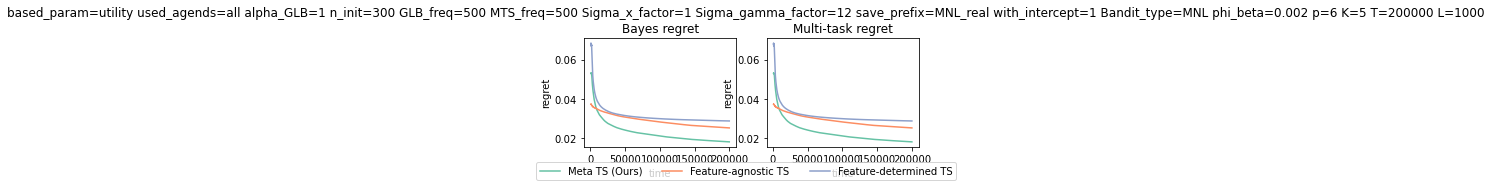

In [11]:
reload(_Experiment)
run = _Experiment.run_experiment(L = L, T = T, K = K, p = p
                                 , phi_beta = phi_beta, Bandit_type = "MNL", real = real
                                 #, print_SNR = True
                                 #, debug_MTB = False
                                 #, only_ratio = False   
                                 , with_intercept = with_intercept, same_reward = same_reward, clip = True
                                 , save_prefix = "MNL_real"
                                 , Sigma_gamma_factor = Sigma_gamma_factor
#                                  , Sigma_x_factor = Sigma_x_factor
                                 #, misspecification = None
                                 , MTS_freq = update_freq
                                 , GLB_freq = update_freq_linear
#                                          , alpha_GLB = 0.25
                                 , n_init = n_init
                                 , based_param = based_param, true_gamma = true_gamma, true_v = true_v, X = X
#                                         , used_agends = ["Oracle TS", "Feature-agnostic TS"]
                                )


r = run.run_multiple_parallel(pm_core, parallel = 'ray')
run.plot_regret(#ci = 68, 
                skip = 1000
                , plot_mean = True
                )
run.save(sub_folder = ["L", "T", "K", "p"])